In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

d = 50
n = 10000

H, R = np.linalg.qr(np.random.normal(np.zeros((d,d)),1))
H = H @ np.diag(np.logspace(-2,2,d)) @ H.T

beta = 100000

thetastar = np.random.normal(np.zeros((d,)),1)



In [3]:
# theory, standard Langevin

evl, evc = np.linalg.eigh(H)

#alpha = 5
lr = 1. / np.max(evl) / 2.
inits = 1.

T = 15000

mu = np.zeros((d,T))
sigma = np.zeros((d,d,T))
sigma[:,:,0] = np.eye(d) * inits
meanloss = np.zeros((T,))

for iT in np.arange(0,T-1):
    meanloss[iT] = 0.5 * np.trace(sigma[:,:,iT] @ H) + 0.5 * (mu[:,iT] - thetastar).T @ H @ (mu[:,iT] - thetastar)
    mu[:,iT+1] = mu[:,iT] - lr * ( H @ (mu[:,iT] - thetastar) )
    sigma[:,:,iT+1] = sigma[:,:,iT] + lr * ( 2 * np.eye(d) / beta - (H @ sigma[:,:,iT] + sigma[:,:,iT].T @ H) )

meanloss[T-1] = 0.5 * np.trace(sigma[:,:,T-1] @ H) + 0.5 * (mu[:,T-1] - thetastar) @ H @ (mu[:,T-1] - thetastar)



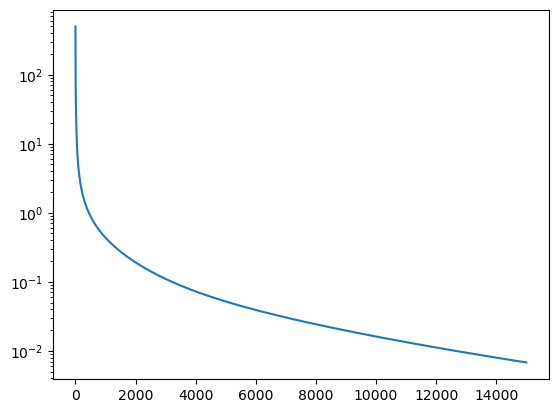

In [4]:
plt.plot(meanloss)
plt.yscale('log')
plt.show()


In [5]:
# theory, pre-conditioning with inverse covariance

alpha = 1.0
lr = alpha/beta

evl, evc = np.linalg.eigh(H)
inits = 2 * alpha / beta / np.min(evl)

T = 15000

muA = np.zeros((d,T))
sigmaA = np.zeros((d,d,T))
sigmaA[:,:,0] = np.eye(d) * inits
meanlossA = np.zeros((T,))

iH = np.linalg.inv(H)
for iT in np.arange(0,T-1):
    meanlossA[iT] = 0.5 * np.trace(sigmaA[:,:,iT] @ H) + 0.5 * (muA[:,iT] - thetastar).T @ H @ (muA[:,iT] - thetastar)
    isigma = np.linalg.inv(sigmaA[:,:,iT])
    muA[:,iT+1] = muA[:,iT] - lr * iH @ isigma @ (muA[:,iT] - thetastar) 
    sigmaA[:,:,iT+1] = sigmaA[:,:,iT] + 2 * lr * ( iH @ isigma @ iH / beta - iH )
    
meanlossA[T-1] = 0.5 * np.trace(sigmaA[:,:,T-1] @ H) + 0.5 * (muA[:,T-1] - thetastar).T @ H @ (muA[:,T-1] - thetastar)



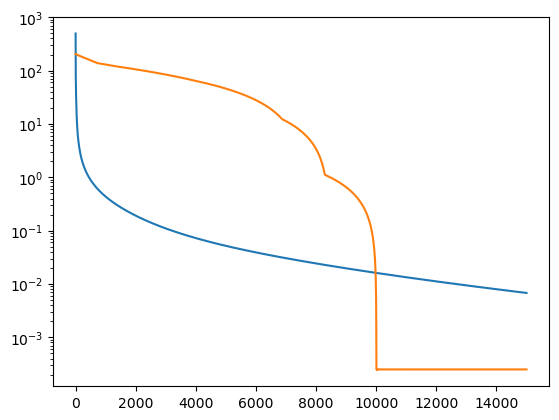

In [6]:

plt.plot(meanloss)
plt.plot(meanlossA)
plt.yscale('log')
plt.show()


In [7]:
# theory, pre-conditioning with inverse square root of covariance

evl, evc = np.linalg.eigh(H)

alpha = np.sqrt(beta) / 2 / np.sqrt(np.max(evl))
lr = alpha / beta
inits = 1. / beta / np.max(evl)

T = 15000

muAs = np.zeros((d,T))
sigmaAs = np.zeros((d,d,T))
sigmaAs[:,:,0] = np.eye(d) * inits
meanlossAs = np.zeros((T,))

iH = np.linalg.inv(H)
for iT in np.arange(0,T-1):
    meanlossAs[iT] = 0.5 * np.trace(sigmaAs[:,:,iT] @ H) + 0.5 * (muAs[:,iT] - thetastar).T @ H @ (muAs[:,iT] - thetastar)
    evl, evc = np.linalg.eigh(sigmaAs[:,:,iT])
    isqsigma = evc @ (1/np.sqrt(evl) * evc.T)
    muAs[:,iT+1] = muAs[:,iT] - lr * isqsigma @ (muAs[:,iT] - thetastar) 
    sigmaAs[:,:,iT+1] = sigmaAs[:,:,iT] + 2 * lr * isqsigma @ ( iH / beta - sigmaAs[:,:,iT] )
    
meanlossAs[T-1] = 0.5 * np.trace(sigmaAs[:,:,T-1] @ H) + 0.5 * (muAs[:,T-1] - thetastar).T @ H @ (muAs[:,T-1] - thetastar)


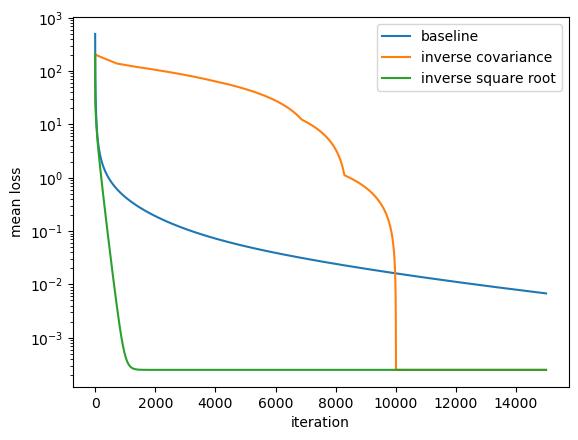

In [10]:
plt.plot(meanloss,label='baseline')
plt.plot(meanlossA,label='inverse covariance')
plt.plot(meanlossAs,label='inverse square root')
plt.yscale('log')
plt.xlabel('iteration')
plt.ylabel('mean loss')
plt.legend()
plt.show()


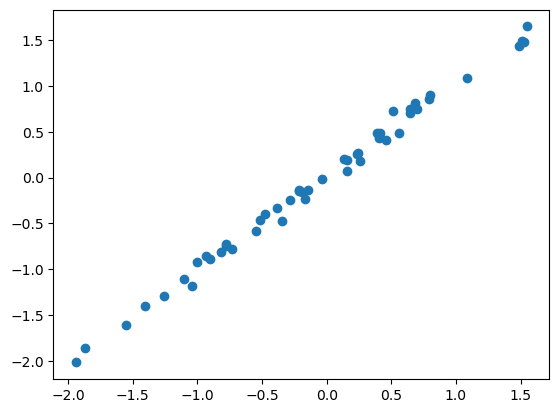

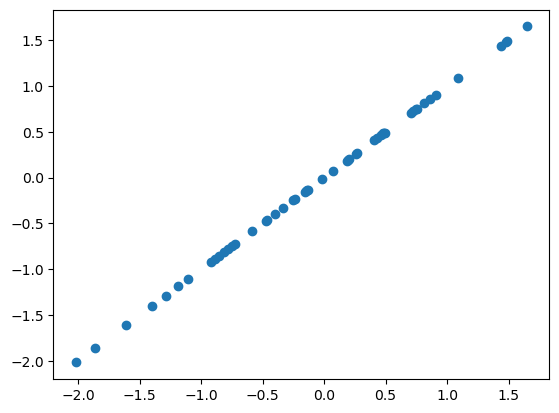

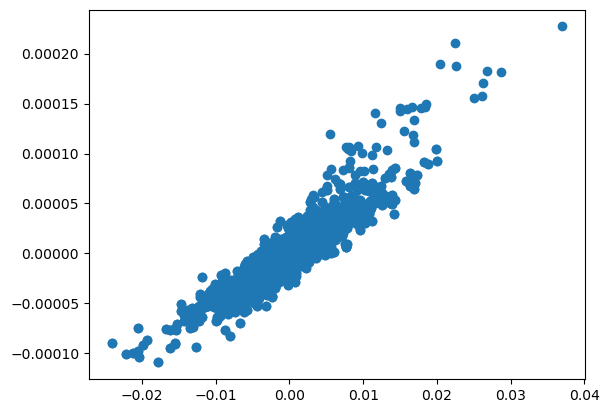

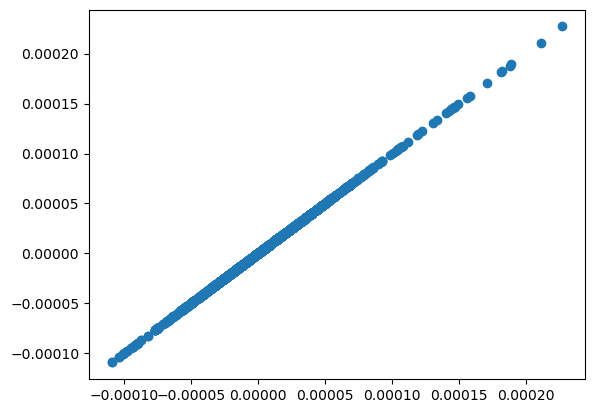

In [9]:

plt.scatter(mu[:,T-1],thetastar)
plt.show()

plt.scatter(muA[:,T-1],thetastar)
plt.show()

plt.scatter(sigma[:,:,T-1],iH/beta)
plt.show()

plt.scatter(sigmaA[:,:,T-1],iH/beta)
plt.show()


In [80]:
print(evl.shape)

(50,)
